Example notebook showing how to use the nested sampler

In [1]:
import os
import sys
import argparse
import torch
from getdist import plots, MCSamples
import getdist
import numpy as np
from scipy.stats import multivariate_normal

In [2]:
path = os.path.realpath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, path)

In [3]:
from nnest import NestedSampler
from nnest.likelihoods import *

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# Likelihood + prior
like = Himmelblau(2)
transform = lambda x: 5*x
#like = Rosenbrock(4)
#transform = lambda x: 5*x
#like = Gaussian(2, 0.9)
#transform = lambda x: 3*x
#like = Eggbox(2)
#transform = lambda x: 5*np.pi*x
#like = GaussianShell(2)
#transform = lambda x: 5*x
#like = GaussianMix(2)
#transform = lambda x: 5*x

In [6]:
sampler = NestedSampler(like.x_dim, like, transform=transform, num_live_points=1000, hidden_dim=16, num_blocks=3, flow='spline')

Creating directory for new run logs/test/run7
[nnest.trainer] [INFO] SingleSpeedSpline(
  (flow): NormalizingFlow(
    (flows): ModuleList(
      (0): ActNorm()
      (1): Invertible1x1Conv()
      (2): NSF_CL(
        (f1): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_features=16, out_features=16, bias=True)
            (5): LeakyReLU(negative_slope=0.2)
            (6): Linear(in_features=16, out_features=23, bias=True)
          )
        )
        (f2): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_fea

In [7]:
sampler.run()

[nnest.sampler] [INFO] MCMC steps [10]
[nnest.sampler] [INFO] Initial scale [1.4142]
[nnest.sampler] [INFO] Volume switch [-1.0000]
[nnest.sampler] [INFO] Step [0] loglstar [-7.6970e+02] max logl [-9.5903e-02] logz [-7.7661e+02] vol [1.00000e+00] ncalls [1001] mean calls [1.0000]
[nnest.sampler] [INFO] Step [200] loglstar [-2.0724e+02] max logl [-9.5903e-02] logz [-2.1289e+02] vol [8.18731e-01] ncalls [1232] mean calls [1.7000]
[nnest.sampler] [INFO] Step [400] loglstar [-1.5550e+02] max logl [-9.5903e-02] logz [-1.6056e+02] vol [6.70320e-01] ncalls [1489] mean calls [1.3000]
[nnest.sampler] [INFO] Step [600] loglstar [-1.2368e+02] max logl [-9.5903e-02] logz [-1.2925e+02] vol [5.48812e-01] ncalls [1840] mean calls [2.1000]
[nnest.sampler] [INFO] Step [800] loglstar [-1.0269e+02] max logl [-9.5903e-02] logz [-1.0793e+02] vol [4.49329e-01] ncalls [2243] mean calls [1.9000]
[nnest.sampler] [INFO] Step [1000] loglstar [-8.5515e+01] max logl [-9.5903e-02] logz [-9.0804e+01] vol [3.67879e-0

[nnest.trainer] [INFO] Best epoch [466] validation loss [-0.0249]
[nnest.sampler] [INFO] Acceptance [0.5500] min ESS [1.3137] max ESS [1.7212] average jump distance [0.0458]
[nnest.sampler] [INFO] Step [4000] loglstar [-4.3777e+00] maxlogl [-2.4480e-03] logz [-9.8213e+00] vol [1.83156e-02] ncalls [22312] scale [0.2481]
[nnest.sampler] [INFO] Acceptance [0.6300] min ESS [2.0314] max ESS [2.2617] average jump distance [0.0809]
[nnest.sampler] [INFO] Step [4200] loglstar [-3.6038e+00] maxlogl [-2.4480e-03] logz [-9.0375e+00] vol [1.49956e-02] ncalls [23724] scale [0.1418]
[nnest.sampler] [INFO] Acceptance [0.5100] min ESS [1.5356] max ESS [1.7996] average jump distance [0.1597]
[nnest.sampler] [INFO] Step [4400] loglstar [-2.9759e+00] maxlogl [-2.4480e-03] logz [-8.4047e+00] vol [1.22773e-02] ncalls [25122] scale [1.0304]
[nnest.sampler] [INFO] Acceptance [0.5900] min ESS [3.0567] max ESS [3.6792] average jump distance [0.1097]
[nnest.sampler] [INFO] Step [4600] loglstar [-2.4598e+00] max

In [8]:
print(sampler.logz)

-5.512181675245175


In [9]:
mc = MCSamples(samples=sampler.samples, weights=sampler.weights, loglikes=sampler.loglikes)

Removed no burn in


In [13]:
print(mc.getEffectiveSamples())
print(mc.getMargeStats())

3181.0982949719555
Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
param1      7.0230093E-01  3.2051023E+00 -3.8511518E+00  3.7048822E+00  two   -3.9560199E+00  3.7836038E+00  two   -3.9588100E+00  3.7828839E+00  two     p_{1}
param2      2.2175604E-01  2.4911671E+00 -3.3941387E+00  3.2596712E+00  two   -3.4013239E+00  3.2666716E+00  two   -3.5027209E+00  3.3508053E+00  two     p_{2}



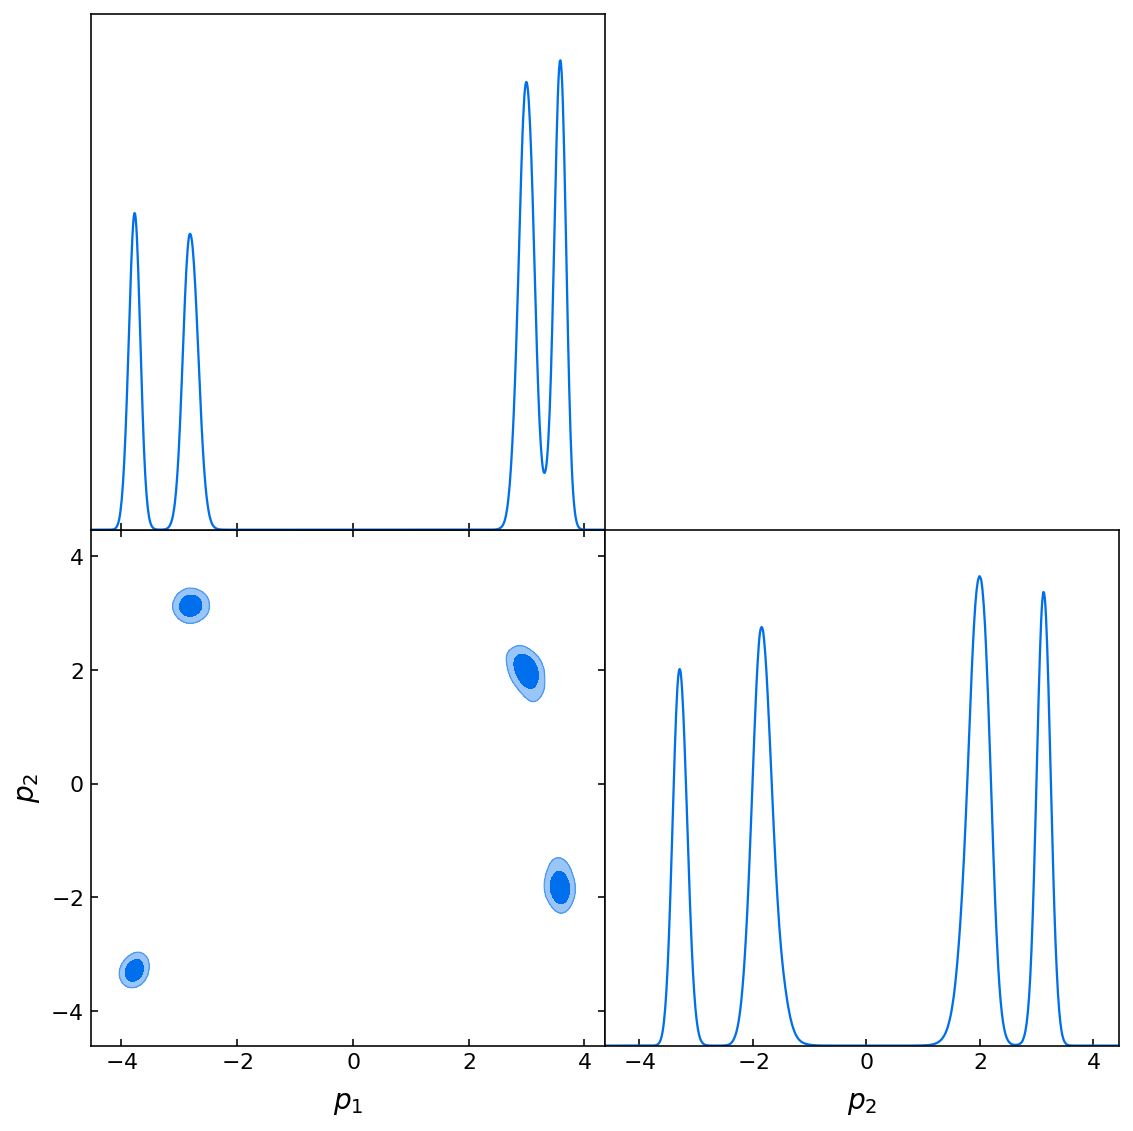

In [11]:
g = plots.getSubplotPlotter(width_inch=8)
g.triangle_plot(mc, filled=True)